In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
print("Number of rows in this data set:", df.shape[0])
print("Number of columns in this data set:", df.shape[1])
print("\nEach row in the dataset represents a data entry for the Combined Cycle Power Plant Data Set, and these data entries have been collected over 6 years (2006-2011), when the power plant was set to work with full load")
print("\nThe columns consist of: \n- The features, which are hourly average ambient variables: Temperature(AT), Exhaust Vacuum(V), Ambient Pressure(AP), Relative Humidity(RH) \n- The variable to be predicted: Hourly Electrical Energy Output(PE)")

Number of rows in this data set: 9568
Number of columns in this data set: 5

Each row in the dataset represents a data entry for the Combined Cycle Power Plant Data Set, and these data entries have been collected over 6 years (2006-2011), when the power plant was set to work with full load

The columns consist of: 
- The features, which are hourly average ambient variables: Temperature(AT), Exhaust Vacuum(V), Ambient Pressure(AP), Relative Humidity(RH) 
- The variable to be predicted: Hourly Electrical Energy Output(PE)


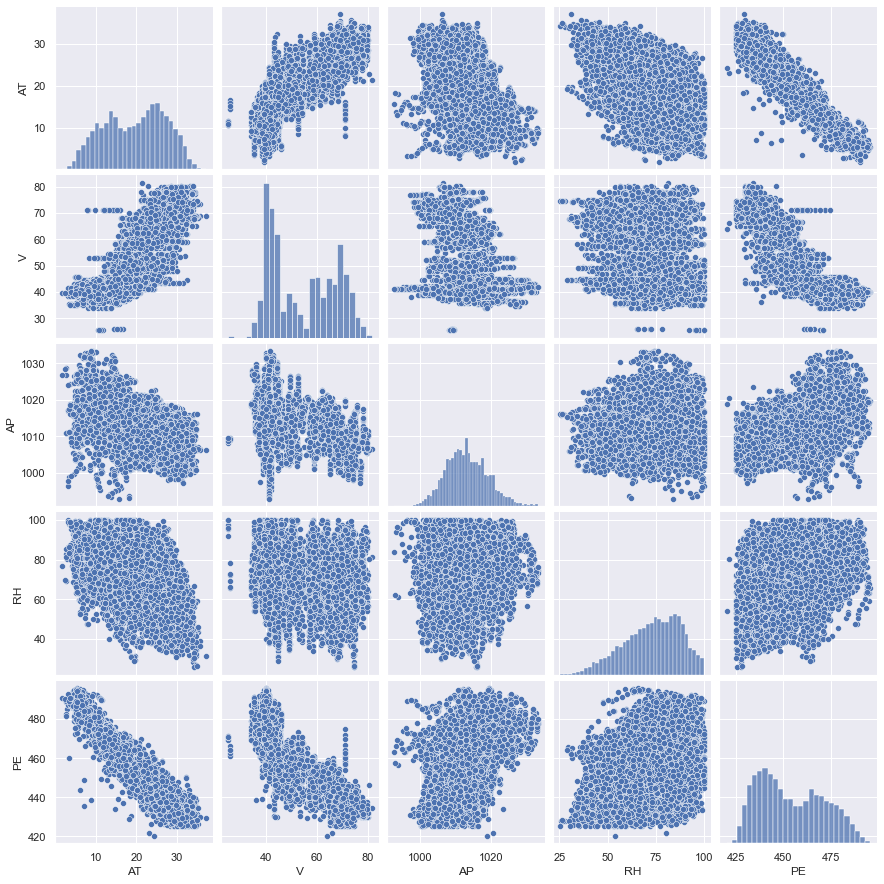

In [4]:
sns.set()
sns.pairplot(df, kind = 'scatter')

In [5]:
print("AT and PE have a strong linear relationship")
print("V and PE have a small linear relationship")
print("AP and PE have a weak linear relationship")
print("RH and PE have a very weak linear relationship (weakest among these 4 relationships)")

AT and PE have a strong linear relationship
V and PE have a small linear relationship
AP and PE have a weak linear relationship
RH and PE have a very weak linear relationship (weakest among these 4 relationships)


In [6]:
var_data = pd.DataFrame({'': ['Mean', 'Median', 'Range', '1st Quartile', '3rd Quartile', 'Interquartile Range'],
                        'AT': [df['AT'].mean(), df['AT'].median(), df['AT'].max()-df['AT'].min(), df['AT'].quantile(0.25), df['AT'].quantile(0.75), df['AT'].quantile(0.75)-df['AT'].quantile(0.25)],
                        'V': [df['V'].mean(), df['V'].median(), df['V'].max()-df['V'].min(), df['V'].quantile(0.25), df['V'].quantile(0.75), df['V'].quantile(0.75)-df['V'].quantile(0.25)],
                        'AP': [df['AP'].mean(), df['AP'].median(), df['AP'].max()-df['AP'].min(), df['AP'].quantile(0.25), df['AP'].quantile(0.75), df['AP'].quantile(0.75)-df['AP'].quantile(0.25)],
                        'RH': [df['RH'].mean(), df['RH'].median(), df['RH'].max()-df['RH'].min(), df['RH'].quantile(0.25), df['RH'].quantile(0.75), df['RH'].quantile(0.75)-df['RH'].quantile(0.25)],
                        'PE': [df['PE'].mean(), df['PE'].median(), df['PE'].max()-df['PE'].min(), df['PE'].quantile(0.25), df['PE'].quantile(0.75), df['PE'].quantile(0.75)-df['PE'].quantile(0.25)]})
var_data.set_index('')

,AT,V,AP,RH,PE
,,,,,
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
1st Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
3rd Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
Interquartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


Predictor: Temperature 
Response: Hourly Electrical Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 6.965e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:18   Log-Likelihood:                -23710.
No. Observations:                7654   AIC:                         4.742e+04
Df Residuals:                    7652   BIC:                         4.744e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

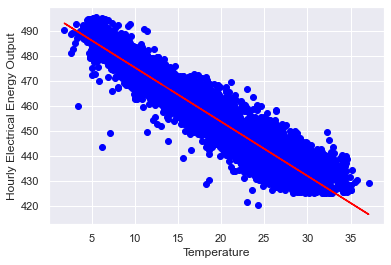



-------------------------------------------------------------------------------------------------------------------------------
Predictor: Exhaust Vacuum 
Response: Hourly Electrical Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 2.421e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:18   Log-Likelihood:                -27102.
No. Observations:                7654   AIC:                         5.421e+04
Df Residuals:                    7652   BIC:                         5.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

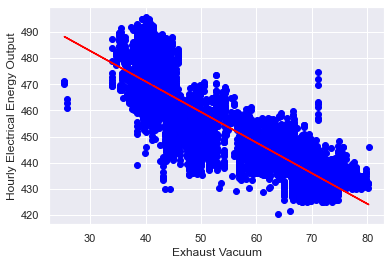



-------------------------------------------------------------------------------------------------------------------------------
Predictor: Ambient Pressure 
Response: Hourly Electrical Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2833.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -31356.
No. Observations:                7654   AIC:                         6.272e+04
Df Residuals:                    7652   BIC:                         6.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
        

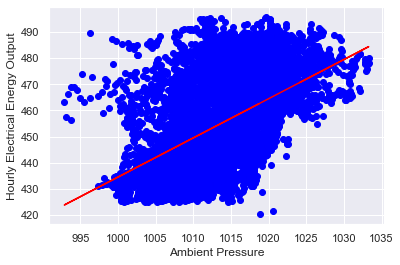



-------------------------------------------------------------------------------------------------------------------------------
Predictor: Relative Humidity 
Response: Hourly Electrical Energy Output

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          6.19e-278
Time:                        23:40:19   Log-Likelihood:                -31926.
No. Observations:                7654   AIC:                         6.386e+04
Df Residuals:                    7652   BIC:                         6.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
       

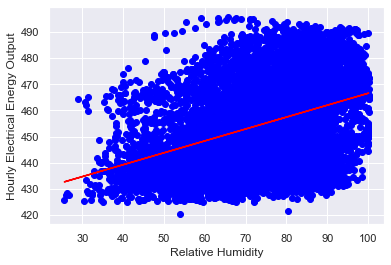



-------------------------------------------------------------------------------------------------------------------------------

If we consider p-value threshold to be 0.05, all the models have a statistically significant association between the predictor and the response, because all of them have a p-value less than 0.05.

Yes, there are outliers present in each of these regression tasks that I think should be removed.


In [7]:
coef = []
X = [df['AT'], df['V'], df['AP'], df['RH']]
predictor_var = ["Temperature","Exhaust Vacuum","Ambient Pressure","Relative Humidity"]
y = df['PE']
test_error = []
for i, j in enumerate(X):
    print("Predictor:", predictor_var[i], "\nResponse: Hourly Electrical Energy Output\n")
    train_X, test_X, train_y, test_y = train_test_split(np.array(j).reshape(-1, 1), y, test_size=0.2, random_state=100)
    lr=LinearRegression()
    lr.fit(train_X, train_y)
    test_pred = lr.predict(test_X)
    test_error.append(mean_squared_error(test_y, test_pred))
    train_X = sm.add_constant(train_X)
    model = sm.OLS(train_y, train_X).fit()
    coef.append(model.params[1])
    print(model.summary())
    plt.scatter(train_X[:, 1], train_y, color = 'blue')
    plt.plot(train_X[:, 1], model.predict(train_X), color = 'red')
    plt.xlabel(predictor_var[i])
    plt.ylabel("Hourly Electrical Energy Output")
    plt.show()
    print('\n\n-------------------------------------------------------------------------------------------------------------------------------')
    
print("\nIf we consider p-value threshold to be 0.05, all the models have a statistically significant association between the predictor and the response, because all of them have a p-value less than 0.05.")
print("\nYes, there are outliers present in each of these regression tasks that I think should be removed.")
    

In [8]:
train_X, test_X, train_y, test_y = train_test_split(df.iloc[:, 0:4], df.iloc[:, 4], test_size=0.2, random_state=100)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
test_pred = multiple_lr.predict(test_X)
test_error1 = mean_squared_error(test_y, test_pred)
train_X = sm.add_constant(train_X) 
model = sm.OLS(train_y, train_X).fit()
coef1 = model.params
print(model.summary())
print("\n\nSince the p-value of every predictor is less than 0.05, we can reject the null hypothesis for each of them")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.564e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -22352.
No. Observations:                7654   AIC:                         4.471e+04
Df Residuals:                    7649   BIC:                         4.475e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        460.2499     10.790     42.656      0.0

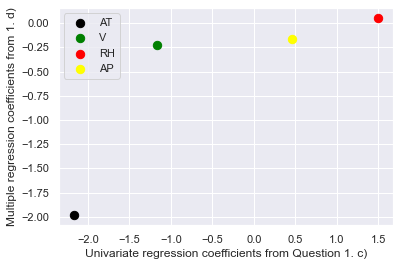

In [9]:
label = ["AT", "V", "RH", "AP"]
color = ['black', 'green', 'red', 'yellow']
for i in range (4):
    plt.scatter(coef[i], coef1[1+i], color = color[i], label = label[i], s = 70)
plt.xlabel("Univariate regression coefficients from Question 1. c)")
plt.ylabel("Multiple regression coefficients from 1. d)")
plt.legend()
plt.show()

In [10]:
test_error2 = []
train_X, test_X, train_y, test_y = train_test_split(df.iloc[:, 0:4], df.iloc[:, 4], test_size=0.2, random_state=100)
for i in range(4):
    poly_features = PolynomialFeatures(3)
    new_x1 = poly_features.fit_transform(np.array(train_X.iloc[:, i]).reshape(-1, 1))
    new_x2 = poly_features.fit_transform(np.array(test_X.iloc[:, i]).reshape(-1, 1))
    multiple_lr=LinearRegression()
    multiple_lr.fit(new_x1, train_y)
    test_pred = multiple_lr.predict(new_x2)
    test_error2.append(mean_squared_error(test_y, test_pred))
    model = sm.OLS(train_y, new_x1).fit()
    print(model.summary(), "\n\n\n")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.714e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -23167.
No. Observations:                7654   AIC:                         4.634e+04
Df Residuals:                    7650   BIC:                         4.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.4682      0.745    661.267      0.0

In [11]:
data = {'AT': df.iloc[:, 0],
        'V': df.iloc[:, 1],
        'AP': df.iloc[:, 2],
        'RH': df.iloc[:, 3],
        'AT*V': df.iloc[:, 0]*df.iloc[:, 1],
        'AT*AP': df.iloc[:, 0]*df.iloc[:, 2],
        'AT*RH': df.iloc[:, 0]*df.iloc[:, 3],
        'V*AP': df.iloc[:, 1]*df.iloc[:, 2],
        'V*RH': df.iloc[:, 1]*df.iloc[:, 3],
        'AP*RH': df.iloc[:, 2]*df.iloc[:, 3],
        'PE': df.iloc[:, 4]}
new_df = pd.DataFrame(data)

train_X, test_X, train_y, test_y = train_test_split(new_df.iloc[:, 0:10], new_df.iloc[:, 10], test_size=0.2, random_state=100)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
test_pred = multiple_lr.predict(test_X)
test_error3 = mean_squared_error(test_y, test_pred)
train_X = sm.add_constant(train_X) 
model = sm.OLS(train_y, train_X).fit()
print(model.summary(), '\n\n')
print("The statistically significant interaction terms are: 'AT*V','AT*RH','V*AP','AP*RH', because they have a p-value less than 0.05")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -21898.
No. Observations:                7654   AIC:                         4.382e+04
Df Residuals:                    7643   BIC:                         4.389e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        653.2743     86.788      7.527      0.0

In [12]:
data1 = {'AT': df.iloc[:, 0],
        'V': df.iloc[:, 1],
        'AP': df.iloc[:, 2],
        'RH': df.iloc[:, 3],
        'PE': df.iloc[:, 4]}
new_df1 = pd.DataFrame(data1)

train_X, test_X, train_y, test_y = train_test_split(new_df1.iloc[:, 0:4], new_df1.iloc[:, 4], test_size=0.3, random_state=42)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
test_pred = multiple_lr.predict(test_X)
test_error4 = mean_squared_error(test_y, test_pred)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
train_pred = multiple_lr.predict(train_X)
test_pred = multiple_lr.predict(test_X)
train_MSE1 = mean_squared_error(train_y, train_pred)
test_MSE1 = mean_squared_error(test_y, test_pred)
train_X = sm.add_constant(train_X) 
model = sm.OLS(train_y, train_X).fit()
print(model.summary(), '\n\n')
print("Train MSE:", train_MSE1)
print("Test MSE:", test_MSE1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [13]:
data2 = {'AT': df.iloc[:, 0],
        'V': df.iloc[:, 1],
        'AP': df.iloc[:, 2],
        'RH': df.iloc[:, 3],
        'AT*V': df.iloc[:, 0]*df.iloc[:, 1],
        'AT*AP': df.iloc[:, 0]*df.iloc[:, 2],
        'AT*RH': df.iloc[:, 0]*df.iloc[:, 3],
        'V*AP': df.iloc[:, 1]*df.iloc[:, 2],
        'V*RH': df.iloc[:, 1]*df.iloc[:, 3],
        'AP*RH': df.iloc[:, 2]*df.iloc[:, 3],
        'AT*AT': df.iloc[:, 0]*df.iloc[:, 0],
        'V*V': df.iloc[:, 1]*df.iloc[:, 1],
        'AP*AP': df.iloc[:, 2]*df.iloc[:, 2],
        'RH*RH': df.iloc[:, 3]*df.iloc[:, 3],
        'PE': df.iloc[:, 4]}
new_df2 = pd.DataFrame(data2)

train_X, test_X, train_y, test_y = train_test_split(new_df2.iloc[:, 0:14], new_df2.iloc[:, 14], test_size=0.3, random_state=100)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
train_pred = multiple_lr.predict(train_X)
test_pred = multiple_lr.predict(test_X)
train_MSE2 = mean_squared_error(train_y, train_pred)
test_MSE2 = mean_squared_error(test_y, test_pred)
train_X = sm.add_constant(train_X) 
model = sm.OLS(train_y, train_X).fit()
print(model.summary(), '\n\n')
print("Train MSE:", train_MSE2)
print("Test MSE:", test_MSE2)
print("\nThe insignificant terms (p-value > 0.05) are: 'AT, 'V', 'AT*AP', 'V*AP', 'V*RH' and 'V*V'")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7424.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -19090.
No. Observations:                6697   AIC:                         3.821e+04
Df Residuals:                    6682   BIC:                         3.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8971.4607   1483.172     -6.049      0.0

In [14]:
data3 = {'AP': df.iloc[:, 2],
        'RH': df.iloc[:, 3],
        'AT*V': df.iloc[:, 0]*df.iloc[:, 1],
        'AT*RH': df.iloc[:, 0]*df.iloc[:, 3],
        'AP*RH': df.iloc[:, 2]*df.iloc[:, 3],
        'AT*AT': df.iloc[:, 0]*df.iloc[:, 0],
        'AP*AP': df.iloc[:, 2]*df.iloc[:, 2],
        'RH*RH': df.iloc[:, 3]*df.iloc[:, 3],
        'PE': df.iloc[:, 4]}
new_df3 = pd.DataFrame(data3)

train_X, test_X, train_y, test_y = train_test_split(new_df3.iloc[:, 0:8], new_df3.iloc[:, 8], test_size=0.3, random_state=100)
multiple_lr=LinearRegression()
multiple_lr.fit(train_X, train_y)
train_pred = multiple_lr.predict(train_X)
test_pred = multiple_lr.predict(test_X)
train_MSE3 = mean_squared_error(train_y, train_pred)
test_MSE3 = mean_squared_error(test_y, test_pred)
train_X = sm.add_constant(train_X) 
model = sm.OLS(train_y, train_X).fit()
print(model.summary(), '\n\n')
print("Train MSE:", train_MSE3)
print("Test MSE:", test_MSE3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -19469.
No. Observations:                6697   AIC:                         3.896e+04
Df Residuals:                    6688   BIC:                         3.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6197.3692   1159.705     -5.344      0.0

The value of k that gives the best fit is: 6
Test error at this k is : 17.287797435562513


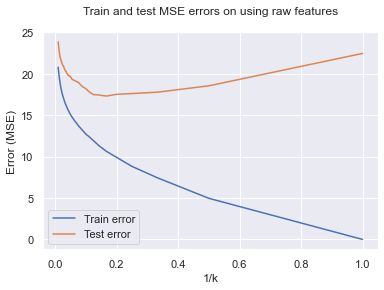

In [15]:
train_X, test_X, train_y, test_y = train_test_split(df.iloc[:, 0:4], df.iloc[:, 4], test_size=0.2, random_state=100)
knn_train_error1 = []
knn_test_error1 = []
for i in range(1, 101):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(train_X, train_y)
    train_pred = knn_regressor.predict(train_X)
    test_pred = knn_regressor.predict(test_X)
    knn_train_error1.append(mean_squared_error(train_y, train_pred))
    knn_test_error1.append(mean_squared_error(test_y, test_pred))
best_k = pd.Series(knn_test_error1).idxmin() + 1
print("The value of k that gives the best fit is:", best_k)
print("Test error at this k is :", min(knn_test_error1))

plt.plot(1/np.arange(1, 101), knn_train_error1, label = "Train error")
plt.plot(1/np.arange(1, 101), knn_test_error1, label = "Test error")
plt.legend()
plt.title("Train and test MSE errors on using raw features\n")
plt.xlabel("1/k")
plt.ylabel("Error (MSE)")
plt.show()

The value of k that gives the best fit is: 3
Test error at this k is : 0.0028517935592162523


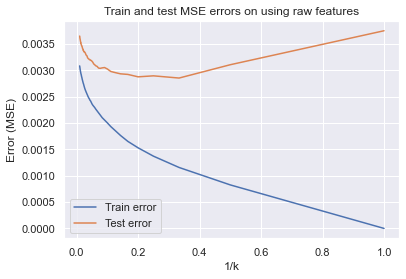

In [16]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
norm_df = pd.DataFrame(scaled, columns=df.columns)
train_X, test_X, train_y, test_y = train_test_split(norm_df.iloc[:, 0:4], norm_df.iloc[:, 4], test_size=0.2, random_state=100)
knn_train_error2 = []
knn_test_error2 = []
for i in range(1, 101):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(train_X, train_y)
    train_pred = knn_regressor.predict(train_X)
    test_pred = knn_regressor.predict(test_X)
    knn_train_error2.append(mean_squared_error(train_y, train_pred))
    knn_test_error2.append(mean_squared_error(test_y, test_pred))
best_k = pd.Series(knn_test_error2).idxmin() + 1
print("The value of k that gives the best fit is:", best_k)
print("Test error at this k is :", min(knn_test_error2))

plt.plot(1/np.arange(1, 101), knn_train_error2, label = "Train error")
plt.plot(1/np.arange(1, 101), knn_test_error2, label = "Test error")
plt.legend()
plt.title("Train and test MSE errors on using raw features")
plt.xlabel("1/k")
plt.ylabel("Error (MSE)")
plt.show()

In [17]:
min_lr_error_list = [min(test_error), test_error1, min(test_error2), test_error3, test_MSE1, test_MSE2, test_MSE3]
lowest_lr_error = min(min_lr_error_list)

min_knn_error_list = [min(knn_test_error1), min(knn_test_error2)]
lowest_knn_error = min(min_knn_error_list)

print("The lowest LR test error is:", lowest_lr_error)
print("The lowest KNN regression test error is:", lowest_knn_error)

print("\nHence, the normalized KNN regression model performs better than the linear regression model that has the smallest test error")

The lowest LR test error is: 19.505397322846143
The lowest KNN regression test error is: 0.0028517935592162523

Hence, the normalized KNN regression model performs better than the linear regression model that has the smallest test error
